<a href="https://colab.research.google.com/github/djsg2021utec/Recommender_System/blob/main/Jaccard_Similarity_Recommender/MovieLens_JS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5> Jaccard similarity Recommender</font></h1>

---

<center>
  <img src="https://bobliu.io/assets/img/cards.509a5045.jpg" width="800" height="300">
</center>


## Objetivo de este Notebook

1. Cargar y preprocesar un Dataset.
2. Realizar un sistema de recomendación basado en Pearson Similarity.
3. Comprobar el performance del sistema.

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y preparar el Dataset</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  
6. <a href="#item34">Validación del modelo</a>  

</font>
</div>

## 1. Contexto


El conjunto de datos MovieLens es uno de los conjuntos de datos de recomendación más populares y ampliamente utilizados en la investigación de sistemas de recomendación. Fue creado por el GroupLens Research Project en la Universidad de Minnesota para impulsar la investigación en sistemas de recomendación, proporcionando un recurso valioso para la comunidad académica y promoviendo el desarrollo y la comprensión de tecnologías de recomendación personalizada.


<b>Descripción de datos</b>

El conjunto de datos MovieLens contiene información sobre:

<b>Películas:</b> Detalles sobre las películas, incluyendo su título, género y año de lanzamiento.

<b>Usuarios:</b> Perfiles de los usuarios que han calificado y/o etiquetado las películas, incluyendo su ID y otros detalles demográficos opcionales.

<b>Calificaciones:</b> Calificaciones numéricas que los usuarios asignan a las películas en una escala de 1 a 5.

<b>Etiquetas:</b> Palabras clave o tags proporcionados por los usuarios para describir el contenido o la esencia de las películas.

El conjunto de datos es ampliamente utilizado con fines académicos y de investigación, siendo una referencia en el diseño y evaluación de sistemas de recomendación de películas. También es útil para el análisis de tendencias y comportamientos en la visualización de películas y la interacción del usuario con el contenido.

<strong>Puede consultar este [link](https://grouplens.org/datasets/movielens/) para leer más sobre la fuente de datos MovieLens proporcionada por GroupLens Research en la Universidad de Minnesota.</strong>

## 2. Descargar y preparar Dataset

In [5]:
# Descargar el dataset Movielens
!curl -o dataset.zip "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
!unzip dataset.zip
!ls -la

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0   398k      0  0:00:02  0:00:02 --:--:--  398k
Archive:  dataset.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  
total 976
drwxr-xr-x 1 root root   4096 Sep 30 15:39 .
drwxr-xr-x 1 root root   4096 Sep 30 15:32 ..
drwxr-xr-x 4 root root   4096 Sep 28 13:26 .config
-rw-r--r-- 1 root root 978202 Sep 30 15:39 dataset.zip
drwxr-xr-x 2 root root   4096 Sep 26  2018 ml-latest-small
drwxr-xr-x 1 root root   4096 Sep 28 13:26 sample_data


In [6]:
# Principales librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # Turn off warnings


In [7]:
links   = pd.read_csv("ml-latest-small/links.csv")
movies  = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")
tags    = pd.read_csv("ml-latest-small/tags.csv")


In [8]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies.head()

In [ ]:
ratings.head()

In [ ]:
tags.head()

In [ ]:
print("  Movies: {} \n  Ratings: {}".format(len(movies), len(ratings)))


  Movies: 9742 
  Ratings: 100836


In [10]:
# Fusiona ambos datasets basados en la columna 'movieId'
data = pd.merge(ratings, movies, on='movieId')

In [11]:
movie_titles = data['title'].unique().tolist()
movie_ids = data['movieId'].unique().tolist()


In [12]:
# Convertir el dataset de calificaciones a un formato binario
data['binary_rating'] = data['rating'].apply(lambda x: 1 if x >= 4 else 0).astype(int)


In [13]:
# Crear matriz pivotada de usuarios y películas con el formato binario
user_movie_binary_rating = data.pivot_table(index='userId', columns='title', values='binary_rating')


In [14]:
#500 películas más vistas
movies_pop = user_movie_binary_rating.isnull().sum().sort_values()[:500]


In [15]:
user_movie_binary_rating = user_movie_binary_rating[movies_pop.index.tolist()]
user_movie_binary_rating = user_movie_binary_rating.reset_index()

In [16]:
# Llenar los valores NaN con 0
user_movie_binary_rating = user_movie_binary_rating.fillna(0)

In [17]:
user_movie_binary_rating

title,userId,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),...,Analyze This (1999),Mortal Kombat (1995),Gran Torino (2008),"Simpsons Movie, The (2007)",Rumble in the Bronx (Hont faan kui) (1995),Lethal Weapon 3 (1992),Beverly Hills Cop (1984),Phenomenon (1996),M*A*S*H (a.k.a. MASH) (1970),The Butterfly Effect (2004)
0,1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,607,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,608,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
608,609,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Muestreo

In [18]:
from sklearn.model_selection import train_test_split

# Convertir la matriz pivotada en un DataFrame y dividir en train y test
train_data, test_data = train_test_split(user_movie_binary_rating, test_size=0.2, random_state=42)


In [19]:
# Volver a crear matrices pivotadas para entrenamiento y prueba
train_data_matrix = train_data.fillna(0)
test_data_matrix = test_data.fillna(0)

In [20]:
test_data_matrix.head()

title,userId,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),...,Analyze This (1999),Mortal Kombat (1995),Gran Torino (2008),"Simpsons Movie, The (2007)",Rumble in the Bronx (Hont faan kui) (1995),Lethal Weapon 3 (1992),Beverly Hills Cop (1984),Phenomenon (1996),M*A*S*H (a.k.a. MASH) (1970),The Butterfly Effect (2004)
81,82,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,219,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,56,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,599,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
264,265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Jaccard Similarity

Aplicaremos el enfoque de similaridad de jaccard con enfoque ítem-ítem

In [21]:
data['rating'] = data['rating'].astype(float)

In [22]:
from sklearn.metrics.pairwise import pairwise_distances

# Convertir DataFrame a matriz NumPy
binary_train_data_numpy = train_data_matrix.values

# Calcular la matriz de similaridad de Jaccard
jaccard_distances = pairwise_distances(binary_train_data_numpy.T, metric='jaccard')  # T para ítem-ítem
jaccard_similarity = 1 - jaccard_distances #jaccard distance: Cuán diferente están
jaccard_df = pd.DataFrame(jaccard_similarity, index=train_data_matrix.columns, columns=train_data_matrix.columns)
jaccard_df = jaccard_df.reset_index()

In [24]:
jaccard_df

title,title,userId,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),...,Analyze This (1999),Mortal Kombat (1995),Gran Torino (2008),"Simpsons Movie, The (2007)",Rumble in the Bronx (Hont faan kui) (1995),Lethal Weapon 3 (1992),Beverly Hills Cop (1984),Phenomenon (1996),M*A*S*H (a.k.a. MASH) (1970),The Butterfly Effect (2004)
0,userId,1.000000,0.395492,0.438525,0.387295,0.377049,0.334016,0.319672,0.215164,0.270492,...,0.022541,0.014344,0.045082,0.030738,0.038934,0.014344,0.024590,0.026639,0.051230,0.040984
1,Forrest Gump (1994),0.395492,1.000000,0.464029,0.364286,0.370909,0.328358,0.246429,0.318584,0.365546,...,0.040816,0.036269,0.091371,0.055838,0.044335,0.010101,0.040609,0.019802,0.068627,0.075758
2,"Shawshank Redemption, The (1994)",0.438525,0.464029,1.000000,0.414035,0.372414,0.300000,0.262799,0.208333,0.351562,...,0.032110,0.013761,0.072727,0.040909,0.030973,0.023148,0.031963,0.031818,0.057522,0.054054
3,Pulp Fiction (1994),0.387295,0.364286,0.414035,1.000000,0.486056,0.348659,0.316794,0.240506,0.348739,...,0.036269,0.020833,0.082051,0.062500,0.066667,0.010309,0.036082,0.020202,0.075377,0.050251
4,"Silence of the Lambs, The (1991)",0.377049,0.370909,0.372414,0.486056,1.000000,0.329502,0.317829,0.267544,0.327731,...,0.042781,0.021390,0.067358,0.047368,0.068421,0.015957,0.037037,0.026042,0.100000,0.068063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Lethal Weapon 3 (1992),0.014344,0.010101,0.023148,0.010309,0.015957,0.024096,0.018750,0.018182,0.022059,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.055556,0.000000,0.000000,0.038462
497,Beverly Hills Cop (1984),0.024590,0.040609,0.031963,0.036082,0.037037,0.067073,0.050000,0.073394,0.074627,...,0.045455,0.117647,0.062500,0.125000,0.068966,0.055556,1.000000,0.000000,0.027778,0.103448
498,Phenomenon (1996),0.026639,0.019802,0.031818,0.020202,0.026042,0.005714,0.049689,0.017241,0.028369,...,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,1.000000,0.055556,0.000000
499,M*A*S*H (a.k.a. MASH) (1970),0.051230,0.068627,0.057522,0.075377,0.100000,0.062147,0.110429,0.074380,0.068027,...,0.028571,0.000000,0.021739,0.052632,0.023256,0.000000,0.027778,0.055556,1.000000,0.046512


In [23]:
pd.set_option('display.max_colwidth', None)

# Seleccionar un usuario (por ejemplo, el usuario con ID 5)
user_id = 83

# Películas que el usuario ha visto
user_movies = data[data['userId'] == user_id]
watched_movies = user_movies[['title', 'genres', 'rating', 'binary_rating']]
watched_movies.sort_values(by = 'rating', ascending = False, inplace = True)

print(f"Películas vistas por el usuario {user_id}:")
watched_movies.head(5)

Películas vistas por el usuario 83:


,title,genres,rating,binary_rating
34329,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi,5.0,1
17484,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,5.0,1
49863,"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Comedy|Romance,5.0,1
55305,Cashback (2006),Comedy|Drama|Romance,5.0,1
17088,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,5.0,1


In [25]:
# Porque te gustó "Truman Show, The (1998)" ....
jaccard_df[['title', 'Truman Show, The (1998)']].sort_values(by = 'Truman Show, The (1998)', ascending = False)[1:].head(3)

title,title,"Truman Show, The (1998)"
108,Ferris Bueller's Day Off (1986),0.25000
230,"Hangover, The (2009)",0.25000
183,Gattaca (1997),0.24359


In [26]:
# Porque te gustó "Terminator 2" ....
jaccard_df[['title', 'Inception (2010)']].sort_values(by = 'Inception (2010)', ascending = False)[1:].head(3)

title,title,Inception (2010)
44,"Dark Knight, The (2008)",0.459459
276,Shutter Island (2010),0.388235
115,"Departed, The (2006)",0.380952


In [27]:
# Porque te gustó "Indiana Jones and the Temple of Doom" ....
jaccard_df[['title', 'Dark Knight, The (2008)']].sort_values(by = 'Dark Knight, The (2008)', ascending = False)[1:].head(3)

title,title,"Dark Knight, The (2008)"
51,Inception (2010),0.459459
227,"Dark Knight Rises, The (2012)",0.380435
115,"Departed, The (2006)",0.372727


In [28]:
%%capture
!pip install adjustText

PCA para entender la similaridad

In [29]:
# Crear matriz pivotada de usuarios y películas
user_movie_rating = data.pivot_table(index='userId', columns='title', values='rating')

#30 películas más vistas
movies_pop = user_movie_rating.isnull().sum().sort_values()[:50]

user_movie_rating = user_movie_rating[movies_pop.index.tolist()]
user_movie_rating = user_movie_rating.reset_index()

movie_correlation = user_movie_rating.fillna(0).corr()
movie_correlation = movie_correlation.reset_index()


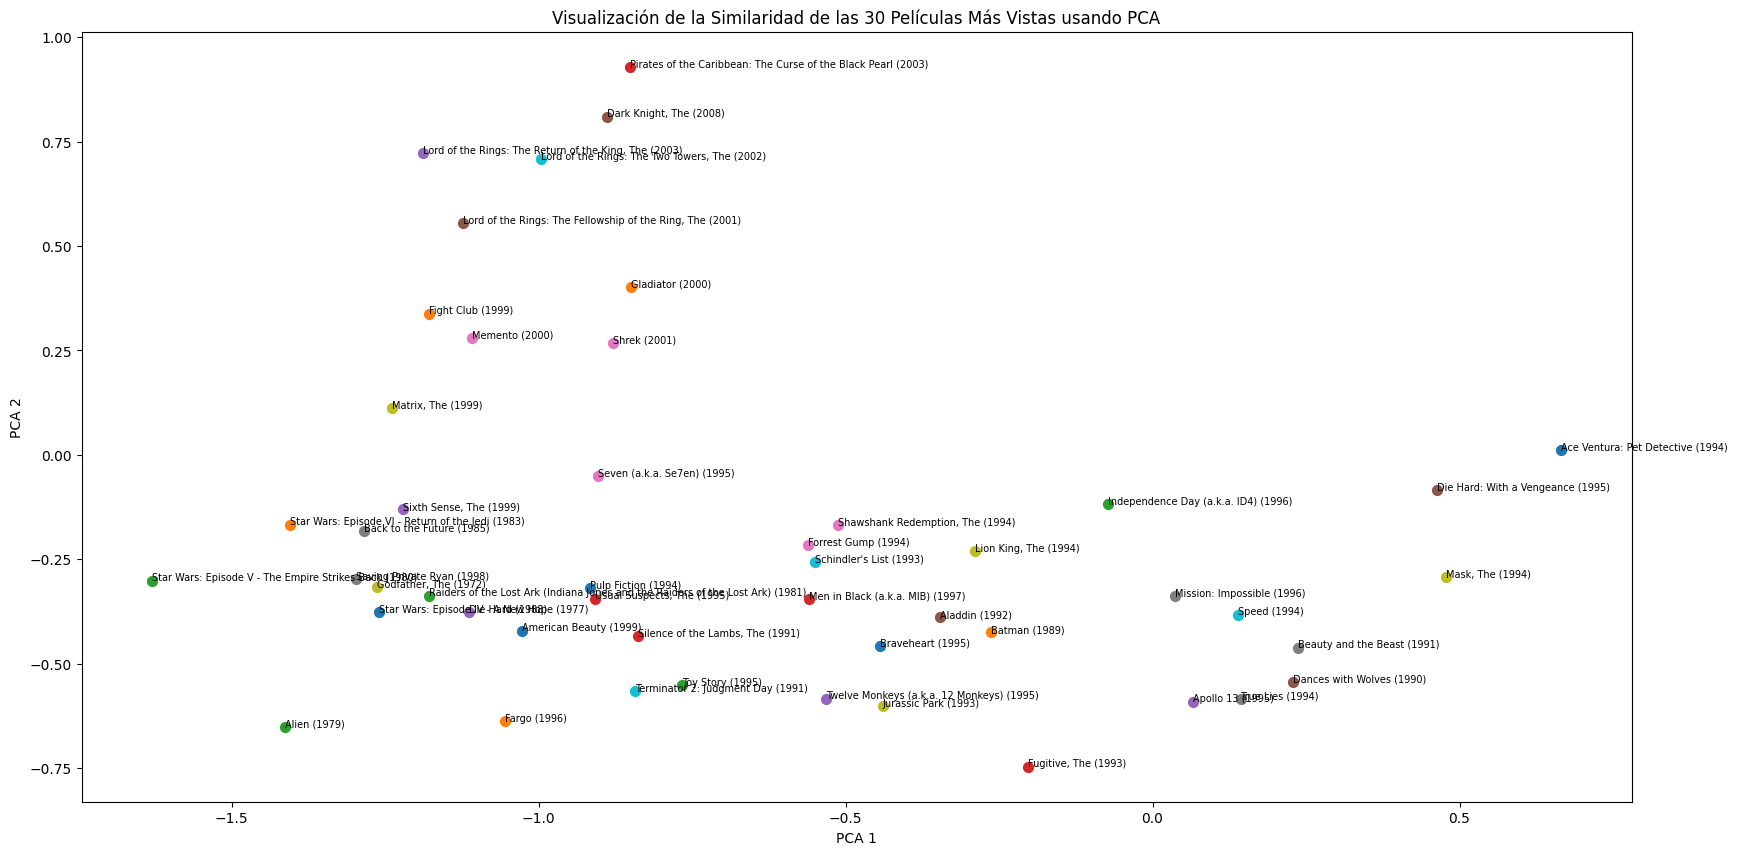

In [30]:
from sklearn.decomposition import PCA
from adjustText import adjust_text

# Aplicar PCA
pca = PCA(n_components=2)
movie_pca = pca.fit_transform(jaccard_df.drop(columns=['title', 'userId']))

# Obtener las n películas más vistas
top_30_movies = user_movie_rating.count().sort_values(ascending=False)[:50].index.tolist()
top_30_movies = list(set(top_30_movies)-set(['title', 'userId']))

# Graficar las n películas más vistas usando PCA
plt.figure(figsize=(20, 10))
for title in top_30_movies:
    idx = movie_correlation[movie_correlation['title'] == title].index[0]
    plt.scatter(movie_pca[idx, 0], movie_pca[idx, 1], s=50)
    plt.text(movie_pca[idx, 0], movie_pca[idx, 1], title, fontsize=7)

# Evitar superposición de etiquetas (si tienes adjustText instalado)
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de la Similaridad de las 30 Películas Más Vistas usando PCA')
plt.show()

## 4. Evaluación del modelo

---
## Gracias por completar este laboratorio!